# Sales Data for Video Games
<b>The data contains sales record for 16598 games across 31 different gaming platforms.</b>
Column Fields in data are:
<ol>
    <li>Rank - Ranking of sales
    <li>Name - Game Title
    <li>Genre - Game's Genre
    <li>Platform - Gaming Platform on which tha game was released
    <li>Year - Year of the game's release
    <li>Publisher - Publisher of the game
    <li>NA_Sales - Sales :North America (millions)
    <li>EU_Sales - Sales :Europe (millions)
    <li>JP_Sales - Sales :Japan (millions)
    <li>Other_Sales - Sales in other parts of the world (millions)
    <il>Global_Sales - Total Sales in the world</il>
    </ol>
    
    

# Questions for Business Understanding
<ul>
    <li>Which years saw the most sales and does data justifies the current popularity of video games?
    <li>How did different gaming platforms do with respect to titles developed and sold?
    <li>Is there real winner among different genres of games too?
</ul>

# Data Understanding
Let's load the data using Pandas library and see its shape and contents.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
df=pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Let's see detailed analysis of data columns using describe() function

In [131]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000




Defining plotting functions which will help us analyze the data using different charts.

In [132]:
"""
df = Dataframe to be used for plotting
column_xaxis = column to be used for x-axis
column_yaxis = column to be used for y-axis
axis_labels = list of both axis labels i.e. ['label for x-axis','label for y-axis']
title = Title of the chart
color = Color of the bars
"""

def sum_plot(df,column_xaxis,column_yaxis,axis_labels,title,color="c"):
    font = {'family' : 'normal',
            'weight' : 'normal',
            'size'   : 12}
    plt.rc('font', **font)
    
    ax=df.groupby(column_xaxis)[column_yaxis].sum().plot.bar(figsize=(20,9),color=color);
    ax.set_title(title,size=20)
    ax.set_xlabel(axis_labels[0],size=16);
    ax.set_ylabel(axis_labels[1],size=14);
    
def count_plot(df,column_xaxis,column_yaxis,axis_labels,title,color="c"):
    font = {'family' : 'normal',
            'weight' : 'normal',
            'size'   : 12}
    plt.rc('font', **font)
    
    ax=df.groupby(column_xaxis)[column_yaxis].count().plot.bar(figsize=(20,9),color=color);
    ax.set_title(title,size=20)
    ax.set_xlabel(axis_labels[0],size=16);
    ax.set_ylabel(axis_labels[1],size=14);
    
def count_plot_top(df,column_xaxis,column_yaxis,axis_labels,title,color="c"):
    font = {'family' : 'normal',
            'weight' : 'normal',
            'size'   : 12}
    plt.rc('font', **font)
    
    ax=df.groupby(column_xaxis)[column_yaxis].count().nlargest(5).plot.bar(figsize=(20,9),color=color);
    ax.set_title(title,size=20)
    ax.set_xlabel(axis_labels[0],size=16);
    ax.set_ylabel(axis_labels[1],size=14);
    

# Data Preprocessing and Preparation

Dropping NaN values in Year, As these values don't help us with finding trends

In [120]:
print('NaN Year values: ',df['Year'].isna().sum())
df=df.dropna(subset=['Year'])

NaN Year values:  271


Convert year column to data type 'int' for better visualization

In [121]:
df['Year']=df['Year'].astype(int)

# Data Modeling and Analysis

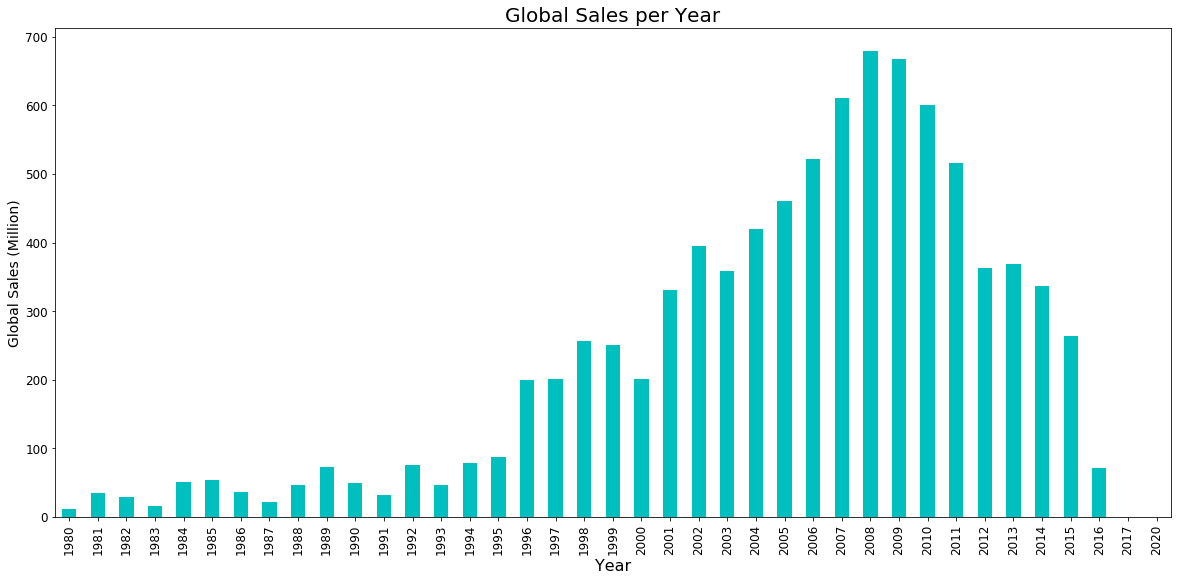

In [125]:
sum_plot(df,'Year','Global_Sales',['Year','Global Sales (Million)'],'Global Sales per Year')

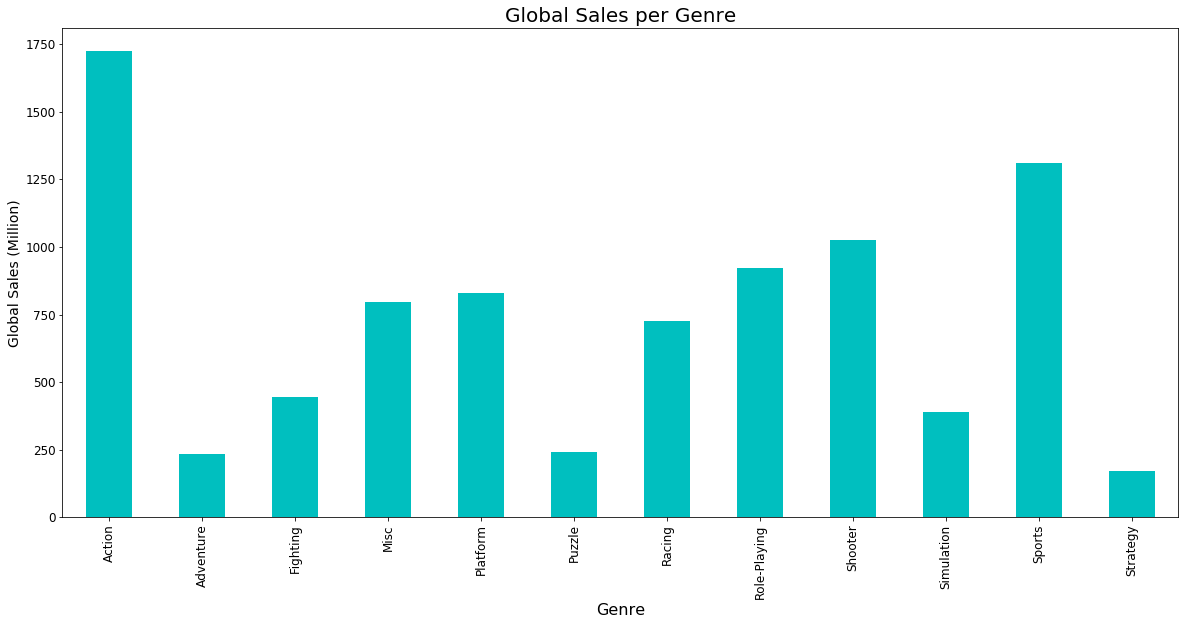

In [126]:
sum_plot(df,'Genre','Global_Sales',['Genre','Global Sales (Million)'],'Global Sales per Genre')

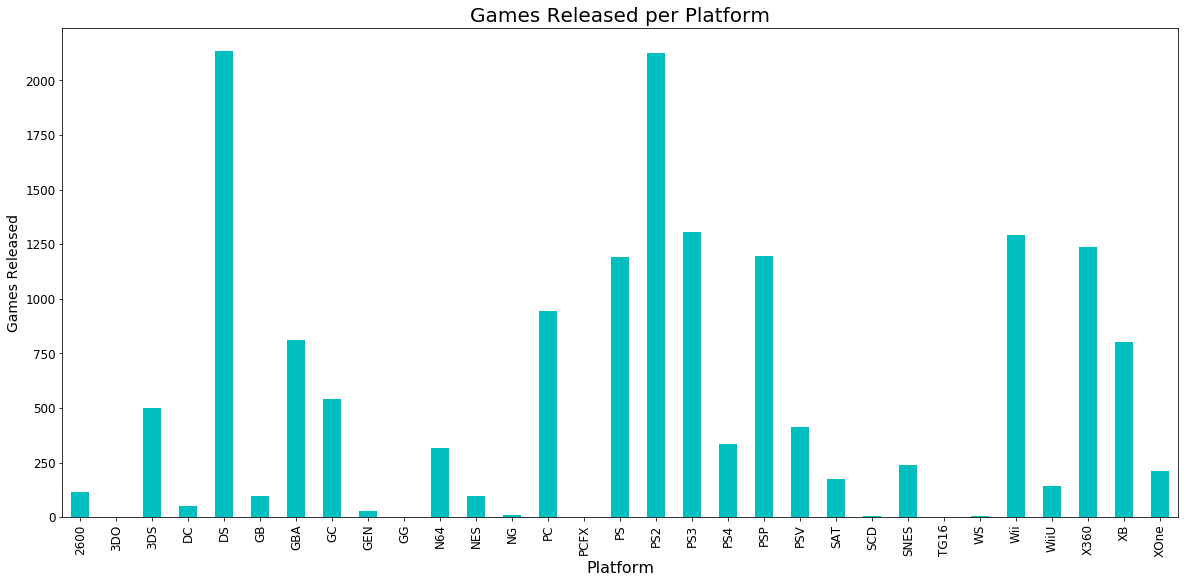

In [127]:
count_plot(df,'Platform','Name',['Platform','Games Released'],'Games Released per Platform')

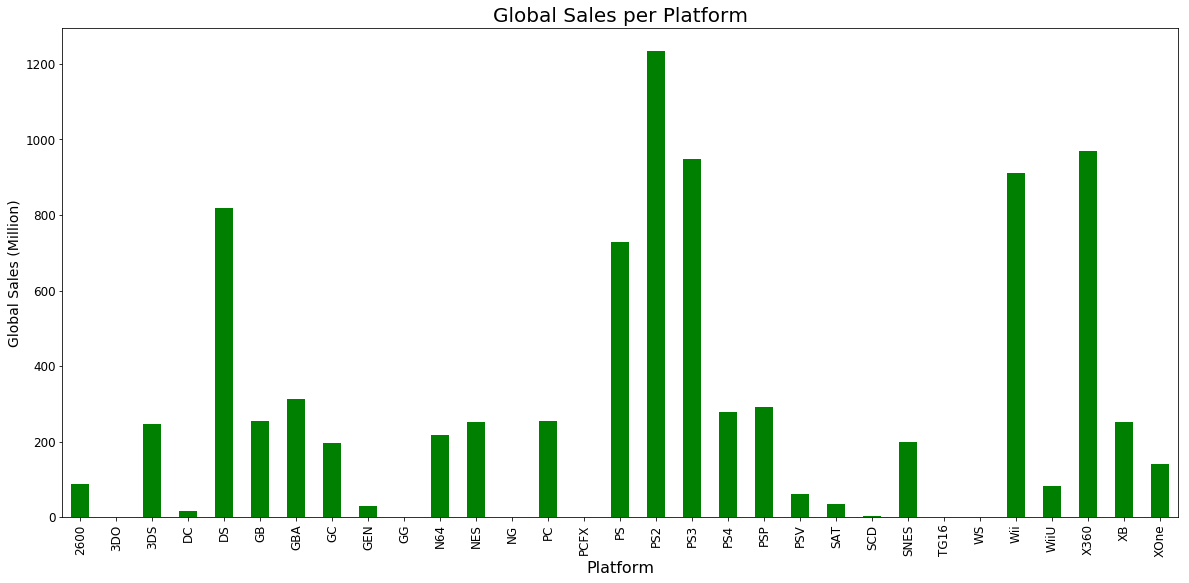

In [128]:
sum_plot(df,'Platform','Global_Sales',['Platform','Global Sales (Million)'],'Global Sales per Platform','Green')

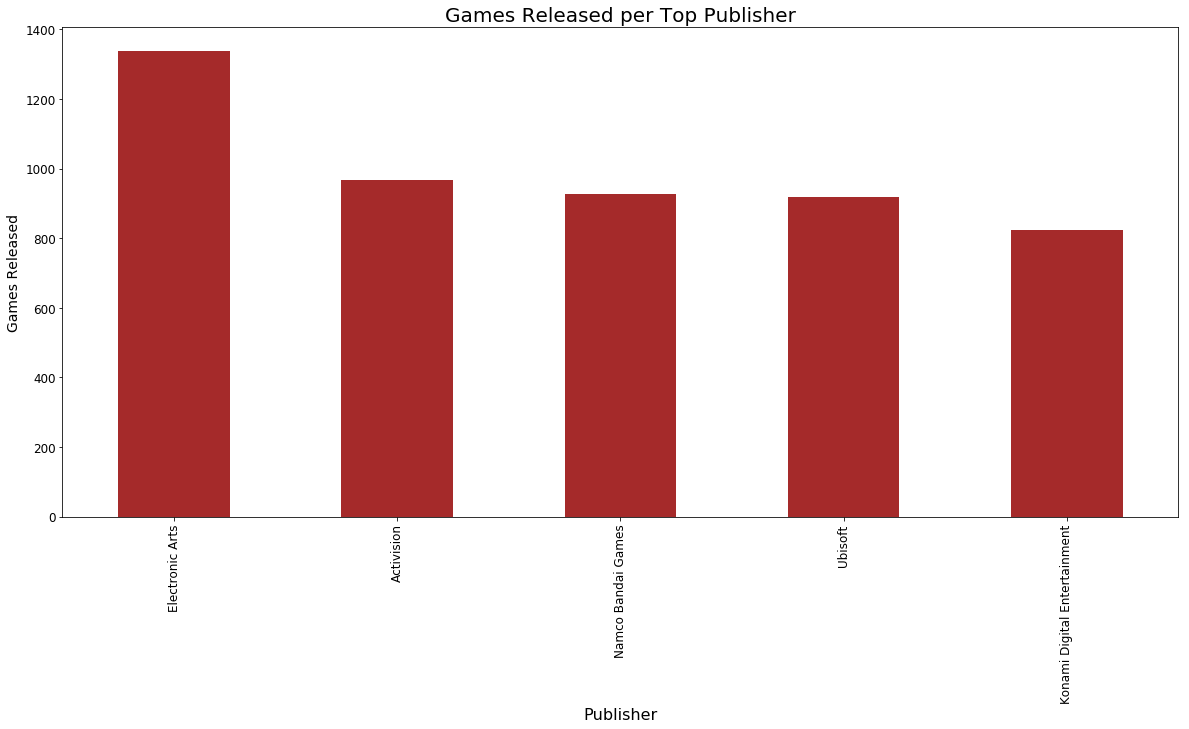

In [129]:
count_plot_top(df,'Publisher','Name',['Publisher','Games Released'],'Games Released per Top Publisher','Brown')

<b>The distribution of genres in "Electronic Arts" shows that they release majority of their games in top two popular genres </b>

In [63]:
df[df['Publisher']=='Electronic Arts']['Genre'].value_counts(normalize=True)

Sports          0.415248
Action          0.135455
Racing          0.117691
Shooter         0.102887
Simulation      0.085862
Misc            0.034049
Fighting        0.028868
Strategy        0.027387
Role-Playing    0.025907
Platform        0.011843
Adventure       0.009623
Puzzle          0.005181
Name: Genre, dtype: float64

# Final Findings and Summary

<b>Data Analysis showed that Sony PS2 is the most succesful gaming platform till date and "Action" and "Sports" genres are the two most popular themes among gamers. Releasing games in popular genres seems to be benificial for publishers </b>